<a href="https://colab.research.google.com/github/maggawron/S_P500/blob/main/S%26P_500_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**S&P 500 Analytics** *by Magdalena Gawron*
Welcome to the core part of my S&P 500 analytics project. This part will focus 
on

*   analysing patterns in daily stock price changes
*   investigating the correlations between ratings and price changes
*   impact of published recommendations on prices

All the data used in this notebook have been fetched via Yahoo APIs and webscraping (notebook available on [github](https://github.com/maggawron/S_P500/blob/main/S%26P_500_Analytics_data_loading.ipynb)). Generated data structures have been saved in the [Data](https://github.com/maggawron/S_P500/tree/main/Data) folder and need to be loaded after importing all packagaes.

#Import all packages

In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
from datetime import date
from copy import deepcopy

import datetime
from datetime import timedelta
from datetime import datetime
from pandas.tseries.offsets import BDay

from google.colab import output
import pickle

import random
output.clear()

print("done")

done


#Upload the all the necessary datasets from the github
All the uploaded datasets have been generated using this [file](https://github.com/maggawron/S_P500/blob/main/S%26P_500_Analytics_data_loading.ipynb)

In [ ]:
#Load the data from file
recom_data = pd.read_csv("https://raw.githubusercontent.com/maggawron/S_P500/main/Data/recom_csv.csv")
recom_data.head()

,Date,Ticker,Action,Firm,To Grade,From Grade
0,2012-07-12,MMM,main,Citigroup,Neutral,NaN
1,2012-07-16,MMM,up,Morgan Stanley,Overweight,Equal-Weight
2,2012-09-05,MMM,main,Citigroup,Neutral,NaN
3,2012-09-10,MMM,main,JP Morgan,Neutral,NaN
4,2012-09-24,MMM,main,Jefferies,Buy,NaN


In [ ]:
all_data = pd.read_csv("https://raw.githubusercontent.com/maggawron/S_P500/main/Data/price_data.csv")
all_data.head()

,Unnamed: 0,date,MMM,ABT,ABBV,ABMD,ACN,ADBE,AAP,AFL,A,APD,ALK,ALB,ARE,ALGN,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANTM,AON,AOS,APA,AIV,...,USB,UNP,UNH,UPS,URI,UHS,UNM,VFC,VLO,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WY,WHR,WMB,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZION,ZTS
0,22,2013-02-01,82.395256,29.058138,26.811115,13.97,62.394005,38.340000,72.141068,22.015566,30.075094,66.488243,20.765219,54.212822,56.793518,31.900000,17.971947,38.599476,388.188202,386.351868,22.991283,265.000000,24.990482,13.311510,33.913494,53.370926,33.270939,66.508339,32.387424,54.925617,41.075459,39.389935,71.332794,31.844128,36.907829,57.936367,51.461544,15.708274,73.334396,15.684979,...,27.112345,56.607834,49.076374,63.135769,52.259998,55.214745,18.869051,29.000664,31.343575,51.880337,44.340000,31.547684,45.439999,37.456295,46.304878,53.943729,23.891668,46.163326,58.162819,33.360500,49.627380,29.683792,93.089996,30.166910,27.550556,42.722824,28.380716,37.198498,22.943378,92.369553,22.816084,81.821365,103.048111,21.421309,31.212353,25.059973,40.948025,43.650002,21.177319,29.255459
1,23,2013-02-04,81.754341,28.740698,26.883224,13.93,61.565456,38.099998,70.740562,21.928434,29.391117,65.296791,20.738457,54.081131,56.178066,32.119999,17.808676,37.816128,379.889893,378.092804,22.782877,259.980011,24.868128,13.188952,33.733570,52.925514,32.697311,66.343483,32.100735,53.420582,40.642895,38.734543,70.869888,31.392992,36.395561,57.492878,50.333843,15.524131,71.796577,15.805237,...,26.755177,55.775352,49.058758,63.088417,50.750000,54.658878,18.513952,28.835918,31.378513,51.810707,44.610001,31.519354,44.630001,37.005093,45.811470,53.374687,23.696018,45.859905,57.453217,33.112225,49.000111,29.373043,90.820000,30.015320,27.260384,42.551762,28.171886,36.888298,23.003778,91.443756,22.590687,80.821869,101.735245,21.214815,30.798330,24.648415,39.712055,43.389999,20.902977,29.264904
2,24,2013-02-05,82.338478,29.032404,26.825535,14.41,62.022003,38.509998,71.759117,22.193983,29.882521,65.559052,20.894524,54.669353,56.185852,32.310001,17.870876,38.143246,383.253265,381.440277,22.977835,266.890015,24.944601,13.283226,33.621136,54.039074,33.176769,66.577728,32.083862,54.213993,40.854767,38.848534,71.522896,32.039463,36.916084,58.397594,51.103989,15.697045,73.231270,15.547538,...,26.893175,56.261311,50.836315,63.791050,51.950001,54.990448,18.965906,29.171299,31.937595,51.493462,45.090000,31.547684,45.599998,37.685436,45.849422,53.450558,23.736298,46.076645,58.393833,34.204655,49.354656,29.413940,91.589996,30.091129,27.330965,42.408092,28.328501,37.087147,23.381260,90.853836,23.015715,81.707748,102.542542,21.245411,31.195457,24.845245,38.556843,43.419998,21.274660,29.283766
3,25,2013-02-06,83.312042,29.255455,26.782272,13.54,61.227287,38.400002,71.396751,21.235525,29.942282,65.566566,21.144222,54.458645,56.700047,32.250000,17.925297,38.143246,385.470459,383.647003,22.937494,262.220001,25.066954,13.726315,33.772648,53.949989,33.176769,65.900955,32.497040,54.483932,41.022491,39.285450,71.572479,32.346409,36.965672,58.016193,51.048958,15.717256,72.947777,15.776600,...,27.282808,56.303566,50.493122,63.877892,52.549999,55.390274,19.256443,29.665518,31.755882,51.578579,44.930000,31.682184,45.860001,37.990162,45.442783,53.317799,23.851377,46.235569,58.839424,34.295689,49.563744,29.520247,92.209999,30.106277,27.425074,42.462818,28.432915,38.168823,23.381260,88.813751,23.041479,82.775406,100.544693,21.283651,31.263046,24.916815,39.084766,43.930000,21.274660,29.274336
4,26,2013-02-07,82.930733,29.504255,26.263062,13.79,61.675373,38.070000,75.549332,20.820602,29.889162,65.461678,21.313658,54.063572,56.458534,32.240002,17.999163,38.788849,387.362366,385.529938,23.266911,260.230011,25.036364,14.244823,33.712032,55.357544,33.082588,65.848885,32.876476,54.459209,40.960690,39.076485,70.440071,32.318501,36.676476,58.273422,51.351528,15.622945,71.942627,15.788055,...,27.225996,55.779572,50.202728,64.580559,52.450001,55.67307

In [ ]:
#Read the file from URL
shares_now = pd.read_pickle("https://github.com/maggawron/S_P500/blob/main/Data/shares_outstanding.pkl?raw=true", compression='infer')
print(shares_now)

{'MMM': 576822016, 'ABT': 1772359936, 'ABBV': 1764829952, 'ABMD': 45189900, 'ACN': 635000000, 'ATVI': 772857024, 'ADBE': 479719008, 'AMD': 1202710016, 'AAP': 67854496, 'AES': 665131008, 'AFL': 702444992, 'A': 308310016, 'APD': 220894000, 'AKAM': 162704992, 'ALK': 123664000, 'ALB': 106457000, 'ARE': 134944000, 'ALXN': 218844992, 'ALGN': 78850400, 'ALLE': 92039000, 'LNT': 249644000, 'ALL': 304068000, 'GOOGL': 300644000, 'GOOG': 329867008, 'MO': 1858419968, 'AMZN': 500889984, 'AMCR': 1568480000, 'AEE': 247207008, 'AAL': 566489984, 'AEP': 496390016, 'AXP': 805201984, 'AIG': 861526016, 'AMT': 444212992, 'AWK': 181272000, 'AMP': 117978000, 'ABC': 204142000, 'AME': 230064992, 'AMGN': 582169024, 'APH': 299155008, 'ADI': 369560000, 'ANSS': 85884096, 'ANTM': 248704000, 'AON': 231650000, 'APA': 377478016, 'AIV': 148866000, 'AAPL': 17102499840, 'AMAT': 913283008, 'APTV': 270024992, 'ADM': 556388992, 'ANET': 75661504, 'AJG': 192322000, 'AIZ': 58759200, 'T': 7126000128, 'ATO': 123355000, 'ADSK': 219

In [ ]:
#Read the file from URL
stock_names = pd.read_pickle("https://github.com/maggawron/S_P500/blob/main/Data/assets_names.pkl?raw=true")
assets = pd.read_pickle("https://github.com/maggawron/S_P500/blob/main/Data/assets_tickers.pkl?raw=true")

names_map = dict(zip(assets, stock_names))
print(names_map)

{'MMM': '3M Company', 'ABT': 'Abbott Laboratories', 'ABBV': 'AbbVie Inc.', 'ABMD': 'ABIOMED Inc', 'ACN': 'Accenture plc', 'ATVI': 'Activision Blizzard', 'ADBE': 'Adobe Inc.', 'AMD': 'Advanced Micro Devices Inc', 'AAP': 'Advance Auto Parts', 'AES': 'AES Corp', 'AFL': 'AFLAC Inc', 'A': 'Agilent Technologies Inc', 'APD': 'Air Products & Chemicals Inc', 'AKAM': 'Akamai Technologies Inc', 'ALK': 'Alaska Air Group Inc', 'ALB': 'Albemarle Corp', 'ARE': 'Alexandria Real Estate Equities', 'ALXN': 'Alexion Pharmaceuticals', 'ALGN': 'Align Technology', 'ALLE': 'Allegion', 'LNT': 'Alliant Energy Corp', 'ALL': 'Allstate Corp', 'GOOGL': 'Alphabet Inc. (Class A)', 'GOOG': 'Alphabet Inc. (Class C)', 'MO': 'Altria Group Inc', 'AMZN': 'Amazon.com Inc.', 'AMCR': 'Amcor plc', 'AEE': 'Ameren Corp', 'AAL': 'American Airlines Group', 'AEP': 'American Electric Power', 'AXP': 'American Express Co', 'AIG': 'American International Group', 'AMT': 'American Tower Corp.', 'AWK': 'American Water Works Company Inc', 

#Data cleanups and utils
Convert dates to datetime format, remove rows with empty values, cleanup typing mistakes in the data, standardize ratings and define functions and datasets used by multiple analyses

In [ ]:
#Convert dates to datetime format
all_data['date'] = pd.to_datetime(all_data['date'])

In [ ]:
#@title Clean up the recomendation data

#Change Date column to datetime format
recom_data['Date'].astype(str)
recom_data["Date"] = pd.to_datetime(recom_data['Date'])

print(recom_data.Date.dtype)

#Clean up rating agencies names 
recom_data.replace('Deutsche bank','Deutsche Bank', inplace=True)
recom_data.replace('Bank oferica', 'Bank of America', inplace=True)
recom_data.replace('Citi', 'Citigroup', inplace=True)

#Drop all recomnedations without target rating data
recom_data.dropna(subset=["To Grade"], inplace=True)

#Drop all recomendations given before start of the analysis
recom_data.drop(recom_data[recom_data['Date'] < "2013-01-01"].index, inplace=True)

#Reset index of recomendation data
recom_data.reset_index(drop=True, inplace=True)

recom_data.head()

datetime64[ns]


,Date,Ticker,Action,Firm,To Grade,From Grade
0,2013-01-03,MMM,main,Jefferies,Buy,NaN
1,2013-01-11,MMM,down,JP Morgan,Underweight,Neutral
2,2013-01-25,MMM,main,Deutsche Bank,Hold,NaN
3,2013-01-25,MMM,main,Credit Suisse,Neutral,NaN
4,2013-01-29,MMM,main,UBS,Buy,NaN


In [ ]:
recom_data = recom_data[recom_data.Ticker != "NVR"]
recom_data = recom_data[recom_data.Ticker != "GD"]
recom_data = recom_data[recom_data.Ticker != "AOS"]

In [ ]:
#@title Standardize ratings given by agencies based on Yahoo Finance methodology
ratings_map = {"Buy": "Buy",
              "Overweight": "Buy",
              "Neutral": "Hold",
              "Outperform": "Buy",
              "Equal-Weight": "Hold",
              "Hold": "Hold",
              "Market Perform": "Hold",
              "Underweight": "Underperform",
              "Underperform": "Underperform",
              "Sell": "Sell",
              "Strong Buy": "Strong Buy",
              "Sector Perform": "Buy",
              "Perform": "Buy",
              "Sector Weight": "Hold",
              "Reduce": "Underperform",
              "Equal-weight": "Hold",
              "Top Pick": "Strong Buy",
              "Conviction Buy": "Strong Buy",
              "Market Outperform": "Buy",
              "Cautious": "Underperform",
              "Positive": "Buy",
              "In-Line": "Hold",
              "Sector Outperform": "Buy",
              "Peer Perform": "Hold",
              "Accumulate": "Buy",
              "Market Weight": "Hold",
              "Negative": "Sell",
              "Outperformer": "Buy",
              "Market Underperform": "Underperform",
              "Strong Sell": "Sell",
              "In-line": "Hold",
              "Above Average": "Buy",
              "Hold Neutral": "Hold",
              "Sector Outperform": "Buy",
              "Peer perform": "Hold",
              "Speculative Buy": "Strong Buy"}

ratings_scalars = {"Strong Buy": 5, "Buy": 4, "Hold": 3, "Underperform": 2, "Sell": 1}

recom_data["Standard Grade"] = recom_data["To Grade"].map(ratings_map)
recom_data["Standard Scalar"] = recom_data["Standard Grade"].map(ratings_scalars)

In [ ]:
#@title Correct action direction errors in the data 
check = deepcopy(recom_data)

check["Standard From Grade"] = check["From Grade"].map(ratings_map)
check["Standard From Grade Scalar"] = check["Standard From Grade"].map(ratings_scalars)

for row in check.iterrows():
  index = row[0]
  if row[1]["Action"] == "down" and row[1]["From Grade"]:
    if row[1]["Standard Scalar"] - row[1]["Standard From Grade Scalar"] > 0:
      check.iloc[[index], [2]] = "up"
  if row[1]["Action"] == "up" and row[1]["From Grade"]:
    if row[1]["Standard Scalar"] - row[1]["Standard From Grade Scalar"] < 0:
      check.iloc[[index], [2]] = "down"

#Double check if the data has any mssing values in the target grade column
nan_df = recom_data[recom_data.loc[:, ["Standard Scalar", "Ticker"]].isna().any(axis=1)]

recom_data.dropna(subset=["Standard Grade"], inplace=True)


In [ ]:
#@title Create a table with recomnedations given by the biggest firms
#Big firm is one that has published more than 500 ratings

big_threshold = 500
recom_data_big_firms = recom_data.groupby('Firm').filter(lambda x : (x['Firm'].count()>=big_threshold).any())

#Change Date column to datetime format
#recom_data_big_firms['Date'].astype(str)
#recom_data_big_firms["Date"] = pd.to_datetime(recom_data_big_firms['Date'])

In [ ]:
firms_names = recom_data_big_firms["Firm"].unique()

#Define a date converting function
def con_to_date(datetime_str):
  return datetime.strptime(datetime_str, '%Y-%m-%d')

In [ ]:
# Create a hashmap with all stock tickers and their names

#Assets will be a list of tickers shared by two databases
assets_p = set(all_data.columns)
assets_r = set(recom_data_big_firms["Ticker"].unique())
assets = assets_p & assets_r

# **Analysis 1:**  Does weekday or month change the stock daily performance?
Check if it is true that stocks gain more on e.g. Mondays or given month of a year

In [ ]:
#@title Create a dataframe with daily gains on all S&P 500 stocks 

all_data_daily_gains = (all_data.iloc[:, 2:] - all_data.iloc[:, 2:].shift(1)) / all_data.iloc[:, 2:].shift(1)
all_data_daily_gains.insert(loc=0, column="date", value=all_data.date)
cols = list(all_data_daily_gains)[1:]

#Concatenate all the daily gains into a single column 
stacked_gains = pd.DataFrame({"date":[], "gain":[]})
for c in cols:
  new = all_data_daily_gains.loc[:, ["date", c]]
  new.columns = ["date", "gain"]
  stacked_gains = pd.concat([stacked_gains, new])

stacked_gains["weekday"] = stacked_gains.date.dt.weekday
stacked_gains["month"] = stacked_gains.date.dt.month

#stacked_gains.describe()


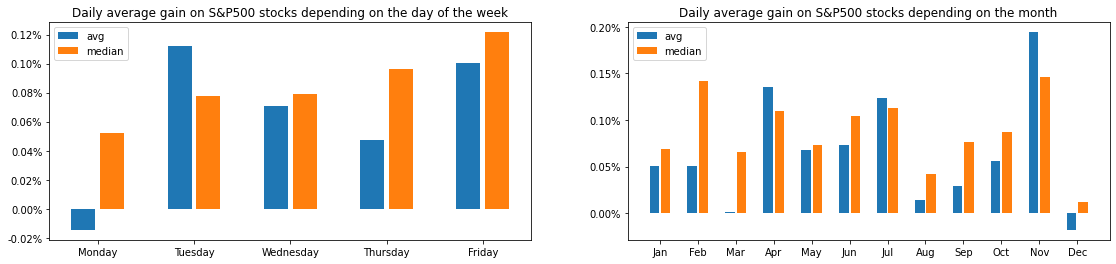

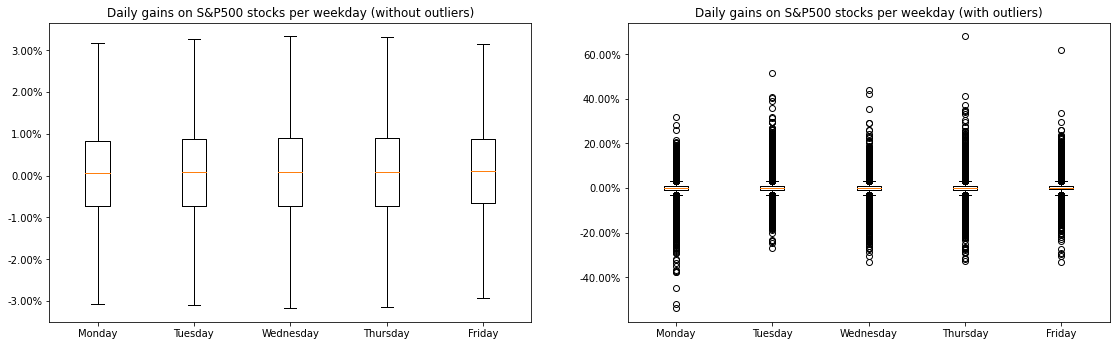

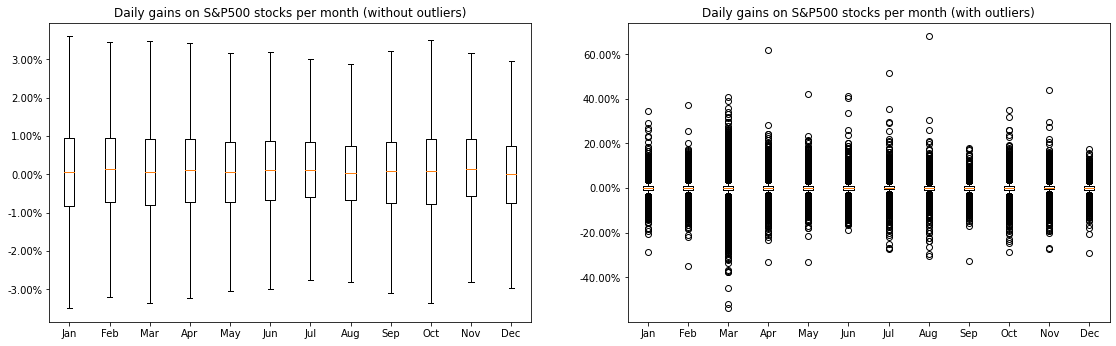

In [ ]:
#@title Create charts to compare median and average per weekday & month and visualize data summaries  
fig = plt.figure(figsize=(19,4))
ax1 = fig.add_subplot(121)
ind = np.arange(5)
plt.bar(ind, stacked_gains.groupby(by="weekday").mean()["gain"]*100, width=0.25, label="avg")
plt.bar(ind+0.3, stacked_gains.groupby(by="weekday").median()["gain"]*100, width=0.25, label="median")
w_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
plt.xticks(ind + 0.3 / 2, labels=w_labels)
plt.legend()
fmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
yticks = tcr.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
plt.title("Daily average gain on S&P500 stocks depending on the day of the week")

ax2 = fig.add_subplot(122)
ind = np.arange(12)
plt.bar(ind, stacked_gains.groupby(by="month").mean()["gain"]*100, width=0.25, label="avg")
plt.bar(ind+0.3, stacked_gains.groupby(by="month").median()["gain"]*100, width=0.25, label="median")
m_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ind+0.3/2, labels=m_labels)
fmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
yticks = tcr.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
plt.legend()
plt.title("Daily average gain on S&P500 stocks depending on the month")
plt.show()

#Whiskers
all_days = []
for i in range(5):
  weekday = stacked_gains.loc[stacked_gains.weekday == i, "gain"]*100
  weekday.dropna(inplace=True, how="any")
  all_days.append(weekday)

all_days = np.array(all_days, dtype="object")
fig = plt.figure(figsize=(19,5.5))
ax1 = fig.add_subplot(121)
plt.boxplot(all_days, labels=w_labels, widths=0.25, whis=1.5, showfliers=False)
ax1.yaxis.set_major_formatter(yticks)
plt.title("Daily gains on S&P500 stocks per weekday (without outliers)")
ax2 = fig.add_subplot(122)
plt.boxplot(all_days, labels=w_labels, widths=0.25, whis=1.5, showfliers=True)
ax2.yaxis.set_major_formatter(yticks)
plt.title("Daily gains on S&P500 stocks per weekday (with outliers)")
plt.show()


fig = plt.figure(figsize=(19,5.5))
all_months = []
for i in range(1,13):
  month = stacked_gains.loc[stacked_gains.month == i, "gain"]*100
  month.dropna(inplace=True, how="any")
  all_months.append(month)

all_months = np.array(all_months, dtype="object")
ax1 = fig.add_subplot(121)
plt.boxplot(all_months, labels=m_labels, widths=0.25, whis=1.5, showfliers=False)
ax1.yaxis.set_major_formatter(yticks)
plt.title("Daily gains on S&P500 stocks per month (without outliers)")

ax2 = fig.add_subplot(122)
plt.boxplot(all_months, labels=m_labels, widths=0.25, whis=1.5, showfliers=True)
ax2.yaxis.set_major_formatter(yticks)
plt.title("Daily gains on S&P500 stocks per month (with outliers)")

plt.show()

In general stock performance differences are rather minor between weekdays and months.

We can expect slightly better median stock performance closer to the weekends (best on Friday, worst on Monday) and during winter time (November to April, except for December).
We can see, that median is a better performance metric than average due to substantial number of outliers. 

In general, stock markets are less volatile during holiday periods (June-August and December). Outliers might be very significant in magnitude (up to 20x higher (even 60%) than normalized maximum gain of 3%) 

#**Analysis 2:** Can I check historical return on day 2 based on given loss/gain thresholds on day 1?
Check what was happening to stock's performance next day if their price was gaining e.g. 3-5% 

In [ ]:
#@title Create the dataframe needed for analysis
stacked_gains["gain tmr"] = stacked_gains["gain"].shift(-1)

last_date = max(stacked_gains.date)

#Drop the last date for which we don't have the tmr
stacked_gains = stacked_gains.loc[stacked_gains['date'] != last_date]


Average return on day 2 given 3% - 5% return on day 1 is -0.08%. Median is -0.04%


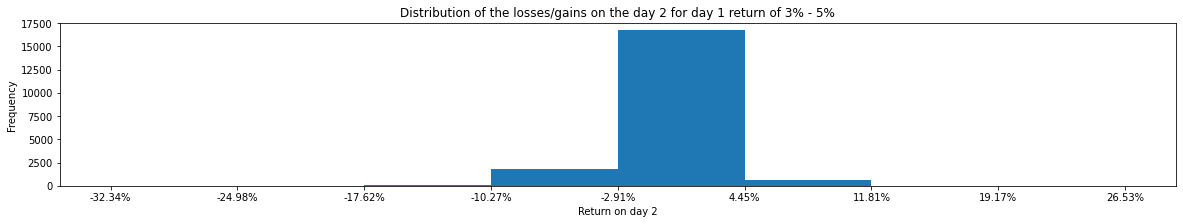

In [ ]:
#@title Define the return thresholds & draw plot chart
min_return =  0.03#@param
max_return =  0.05#@param

new_df = stacked_gains.loc[(stacked_gains['gain'] > min_return) & (stacked_gains['gain'] < max_return)]
average = new_df["gain tmr"].mean(axis=0)
median = new_df["gain tmr"].median(axis=0)
print(f"Average return on day 2 given {min_return:.0%} - {max_return:.0%} return on day 1 is {average:.2%}.", end=" ")
print(f"Median is {median:.2%}")
fig = plt.figure(figsize=(20,3))
ax = plt.subplot()
n, bins, patches = ax.hist(new_df["gain tmr"]*100, bins=8)
locs, labels = plt.xticks(bins, bins)
ax.set_ylabel('Frequency')
fmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
xticks = tcr.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.set_xlabel('Return on day 2')
plt.title(f"Distribution of the losses/gains on the day 2 for day 1 return of {min_return:.0%} - {max_return:.0%}")
plt.show()

#**Analysis 3**: Are ratings published by major rating agencies are reflected by price changes?

Let us check if investing into newly rated stocks for some time (30-90 days) can bring better results than investing into all stocks. We will be looking at averaged performance of recomended stocks from day of publishing recommendation until day X after. For the baseline, we will pick average return from all stocks during whole analysis period. Available ratings are:
*  Strong Buy
*  Buy
*  Hold
*  Underperform
*  Sell

Major rating firm is a company that published more than 500 ratings within last 8 years. 

In [ ]:
#@title Define a ploting function
avg_gain_d = stacked_gains["gain"].mean()

def plot_market_reaction(recomendation_data, offset_days, 
                         price_data, firms_names, rating="Buy", avg_gain_d=avg_gain_d):
  
  for ind, name in enumerate(firms_names):
    f_up = pd.DataFrame()
    for _, row in recomendation_data.iterrows():
      if row['Standard Grade'] == rating and row["Firm"] == name\
      and row["Date"] < (con_to_date("2020-11-10") - pd.DateOffset(offset_days)):
        row_ind = price_data[price_data.date >= row["Date"]].index.values[0]
        col_ind = price_data.columns.get_loc(row["Ticker"])
        new_between = price_data.iloc[row_ind:row_ind+offset_days, col_ind]
        if len(new_between) > 0:
          scale = new_between.iloc[0]
          prices_scaled = (new_between / scale -1)*100
          prices_scaled.reset_index(drop=True, inplace=True)
          f_up = pd.concat([f_up, prices_scaled], axis=1)
    
    if len(f_up) > 0:
      moves_avg = f_up.mean(axis=1)
      fig = plt.figure(figsize=(20,3))
      ax1 = fig.add_subplot(121)
      ax1.yaxis.set_major_formatter(tcr.PercentFormatter(decimals=None))

      plt.plot(moves_avg, label=name)
      daily_gains = [((1+avg_gain_d)**x - 1)*100 for x in range(offset_days)]
      plt.plot(daily_gains,  "r--", label="Avg growth")
      plt.title(f'Market reaction on publishing of rating "{rating}" by {name}')
      plt.xlabel("Days after rating publishing")
      plt.ylabel("Averaged percentage gain/loss from publishing date")
      plt.legend()

      last_gain_loss = f_up.iloc[-1]
      ax2 = fig.add_subplot(122)
      bins = [-30, -20, -10, 0, 10, 20, 30, 40, 50]
      
      plt.hist(last_gain_loss, bins=bins)
      plt.xticks(bins)
      ax2.xaxis.set_major_formatter(tcr.PercentFormatter())
      
      plt.title(f"Stocks value change distribution after {offset_days} trading days")
      plt.xlabel("Percentage buckets")
      plt.ylabel("Number of stocks")
      plt.show()
      

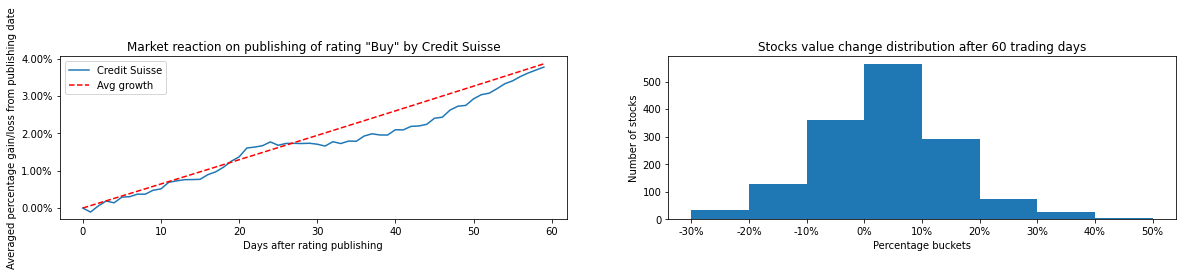

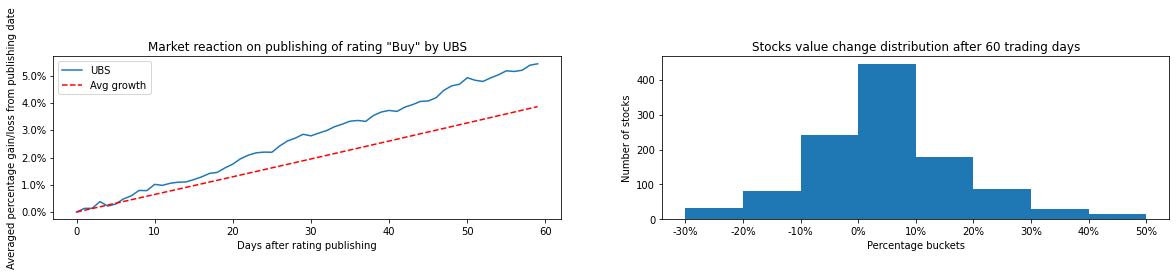

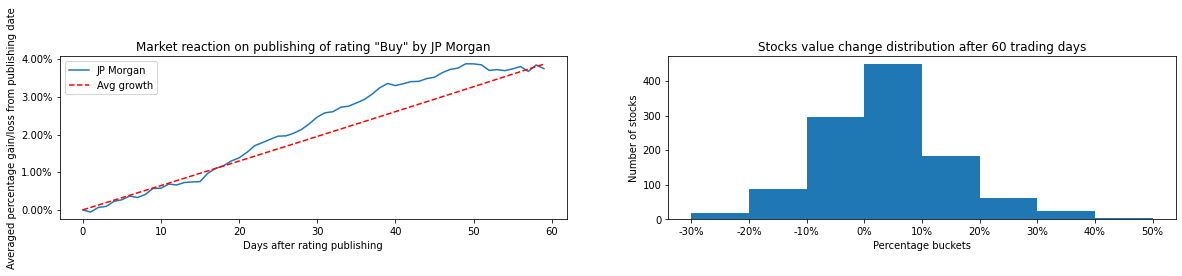

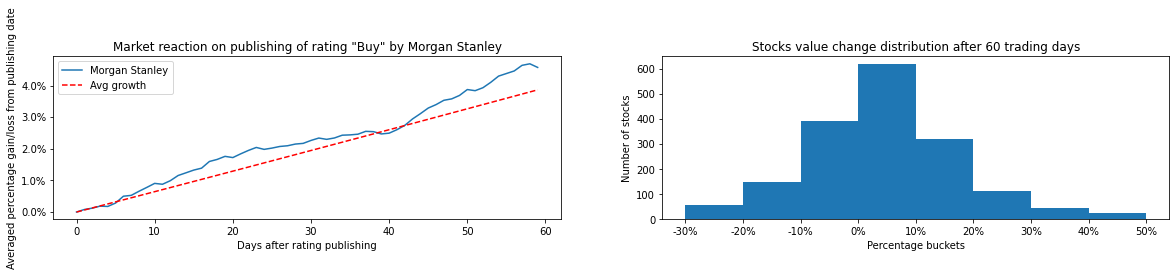

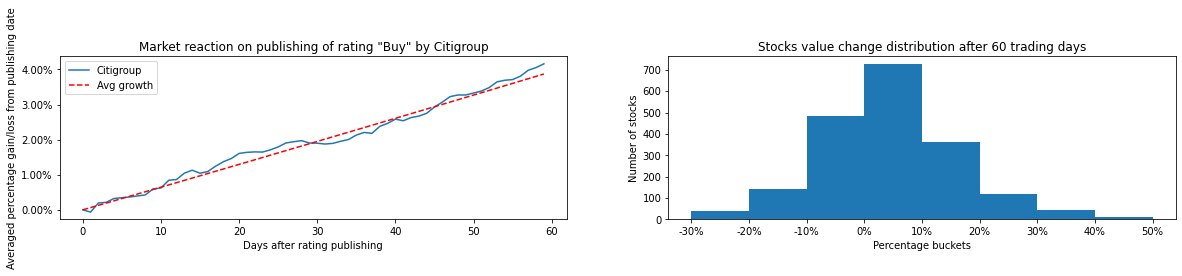

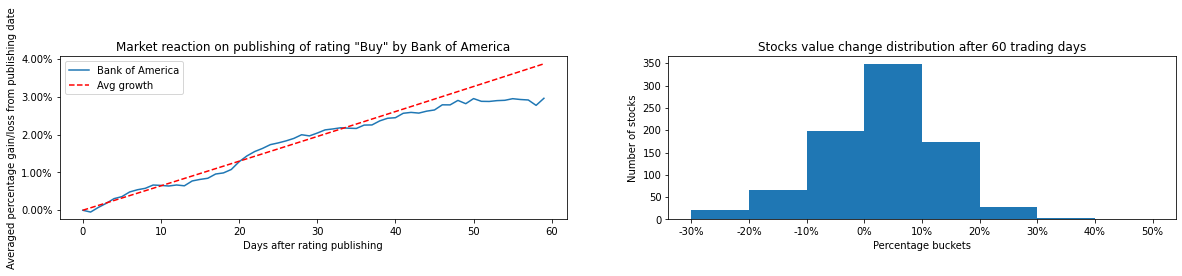

In [ ]:
#@title Do markets react to SP500 rating published by major firm?

rating = "Buy" #@param
selected_firms = ["Credit Suisse", "UBS", "JP Morgan", "Morgan Stanley", "Citigroup", "Bank of America"] #@param
offset_days =  60#@param

if len(selected_firms) == 0:
  selected_firms = firms_names
  
plot_market_reaction(recom_data_big_firms, offset_days, all_data, 
                     selected_firms, rating=rating)

#**Analysis 4:** What is the ratings snapshot per company over time?
Generate a summary of given ratings at the day (dots) and compare with overall price development

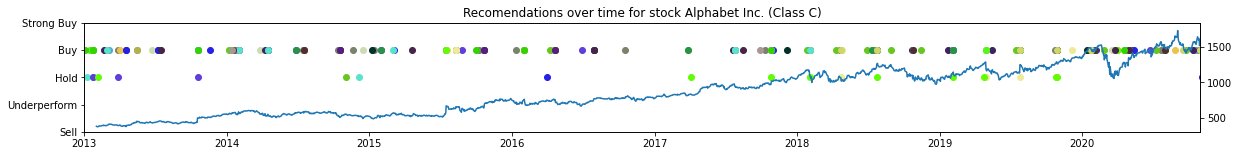

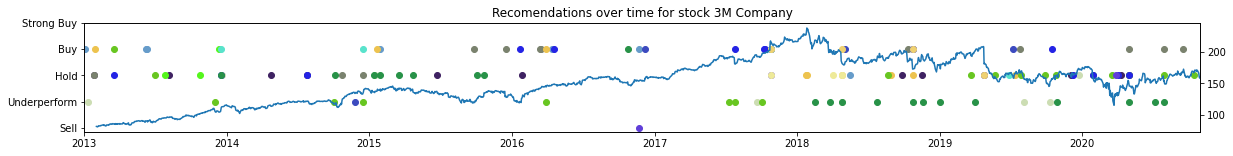

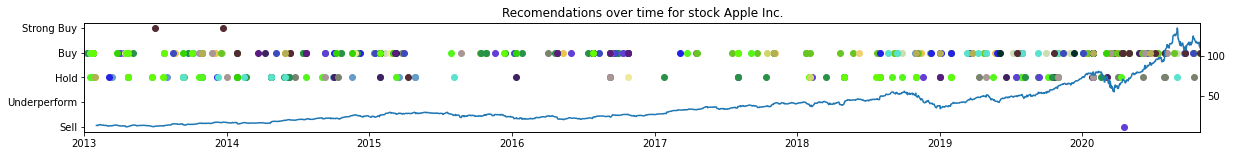

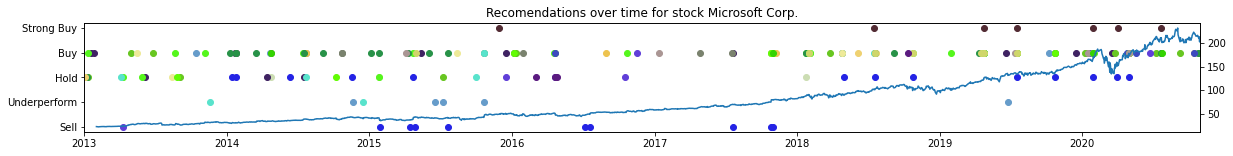

In [ ]:
#@title Input the names of the stocks to be analyzed. Empty list results in all stocks shown.

stock_list = ["GOOG", "MMM", "AAPL", "MSFT"] #@param

#generate random colors for all rating agencies
colors = []
for i in range(len(firms_names)):
  rgb = (random.randint(0,255), random.randint(0,255), random.randint(0,255)) 
  hex = '#%02x%02x%02x' % rgb
  colors.append(hex)

if len(stock_list) == 0:
  analysed_stocks = assets
else:
  analysed_stocks = stock_list

for ticker in analysed_stocks:
  firms = recom_data_big_firms.loc[recom_data_big_firms.Ticker == ticker]["Firm"]
  ylabels = ["Sell", "Underperform", "Hold", "Buy", "Strong Buy"]
  fig, ax = plt.subplots(figsize=(20,2))

  dates_stock = all_data.loc[:, ["date", ticker]]
  dates_stock.dropna(inplace=True)
  x_dates = dates_stock.loc[:, "date"]
  y_prices = dates_stock.loc[:, ticker]

  #Plot stock price on the secondary axis
  ax_prices = ax.twinx()
  ax_prices.plot(x_dates, y_prices)
  
  for j, firm in enumerate(firms_names):
    x_dates = recom_data_big_firms.loc[(recom_data_big_firms.Ticker == ticker) & (recom_data_big_firms.Firm == firm)]["Date"]
    y_scalars = recom_data_big_firms.loc[(recom_data_big_firms.Ticker == ticker) & (recom_data_big_firms.Firm == firm)]["Standard Scalar"]
    ax.scatter(x_dates, y_scalars, label=firm, c=colors[j])
    ax.set_yticks([1,2,3,4,5])
    ax.set_yticklabels(ylabels)

  ax.set_xlim([con_to_date("2013-01-01"), con_to_date("2020-10-30")])
  plt.title(f"Recomendations over time for stock {names_map[ticker]}")
  plt.show()

#**Analysis 5:** What is the overview of ratings published last 2 months and is it a good predictor of future share price?
Like in previous analysis, we will compare overall price changes to the consolidated ratings published during each period 

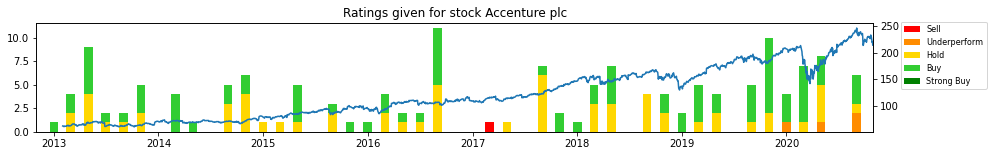

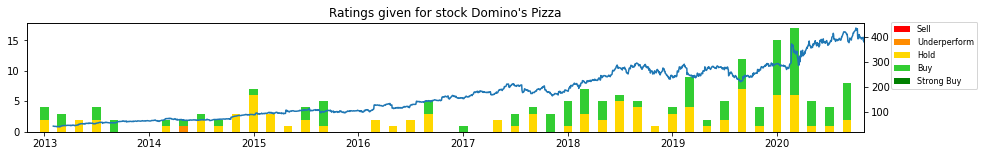

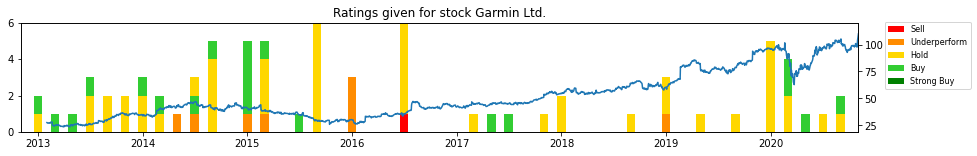

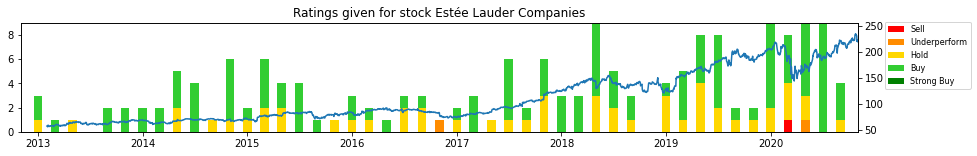

In [ ]:
#@title Input the names of the stocks to be analyzed. Empty list results in all stocks shown.
stock_list = ["ACN", "DPZ", "GRMN", "EL"] #@param

#Create columns names in a datetime format
months = range(1,13,2)
years = range(2013,2021)
month_periods = []

for y in years:
  for m in months:
    d = datetime(y, m, 1)
    month_periods.append(d)

if len(stock_list) == 0:
  analysed_stocks = assets
else:
  analysed_stocks = stock_list

#Create dataframes with rating consensus
for ti in analysed_stocks:
  rating_df = pd.DataFrame()
  ticker_df = recom_data.loc[recom_data["Ticker"] == ti, 
                             ["Date", "Standard Scalar"]]
  ticker_df["Counter"] = 1
  for i in range(len(month_periods)-1):
    month_data = ticker_df.loc[(ticker_df.Date > month_periods[i]) 
    & (ticker_df.Date < month_periods[i+1])]

    grouped = month_data.groupby(by="Standard Scalar")
    result = grouped.sum()["Counter"]
    keys = [scalar for scalar, df in grouped]
    to_add = [month_periods[i], 0, 0, 0, 0, 0]
    for i, rating_c in zip(keys, result):
      if i == 1: to_add[1] = rating_c
      if i == 2: to_add[2] = rating_c
      if i == 3: to_add[3] = rating_c
      if i == 4: to_add[4] = rating_c
      if i == 5: to_add[5] = rating_c
    numpy_list = np.array(to_add).T
    df = pd.DataFrame(numpy_list).transpose()
    rating_df = rating_df.append(df,ignore_index=True)
  rating_df.columns = ["month", 1, 2, 3, 4, 5]

  fig, ax = plt.subplots(figsize=(15,2))

  x_dates = rating_df["month"]
  y_1 = rating_df[1]
  y_2 = rating_df[2]
  y_3 = rating_df[3]
  y_4 = rating_df[4]
  y_5 = rating_df[5]
  barwidth = 30

  plt.bar(x_dates, y_1, width = barwidth, color="r")
  plt.bar(x_dates, y_2, bottom=y_1, width = barwidth, color="darkorange")
  plt.bar(x_dates, y_3, bottom=y_2, width = barwidth, color = "gold")
  plt.bar(x_dates, y_4, bottom=y_3, width = barwidth, color="limegreen")
  plt.bar(x_dates, y_5, bottom = y_4, width = barwidth, color="g")
  ax.set_xlim([con_to_date("2012-11-01"), con_to_date("2020-10-30")])
  xlabels = ["Sell", "Underperform", "Hold", "Buy", "Strong Buy"]

  dates_stock = all_data.loc[:, ["date", ti]]
  dates_stock.dropna(inplace=True)
  x_dates = dates_stock.loc[:, "date"]
  y_prices = dates_stock.loc[:, ti]

  #Plot stock price on the secondary axis
  ax_prices = ax.twinx()
  ax_prices.plot(x_dates, y_prices) 

  ax.legend(xlabels, fontsize=8, bbox_to_anchor=(1.14, 1.05))
  plt.title(f"Ratings given for stock {names_map[ti]}")
  plt.show()
